# Projeto Final - Machine Learning I

## Sobre o projeto

- Dataset obtido no [Kaggle](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling)
- Os dados serão utilizados para criar modelos de classificação
- Serão apresentados 4 algoritmos diferentes (escolher): KNN, árvore de decisão, random forest, bagging, MLP
- A avaliação dos modelos será realizada por meio de 4 métricas: MAE, MAP, RRSE, RNSE

## Etapas iniciais

**Importando as bibliotecas**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Abrindo o arquivo**

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Análise exploratória

**Removendo valores duplicados, caso existam**

In [4]:
df = df.drop_duplicates()

**Removendo colunas desnecessárias**

In [5]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

**Informações gerais**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


**Transformando variáveis categóricas em dummies**

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
colunas = ['Gender', 'Geography']
for col in colunas:
    one_hot = pd.get_dummies(df[col], drop_first=True)
    df = df.drop(columns=[col])
    df = df.join(one_hot)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Male             10000 non-null  uint8  
 10  Germany          10000 non-null  uint8  
 11  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 1.0 MB


In [14]:
df.isna().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Male               0
Germany            0
Spain              0
dtype: int64

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


**Distribuição das variáveis**

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Male,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00


**Distribuição da variável alvo 'Exited'**

,index,Exited
0,0,7963
1,1,2037


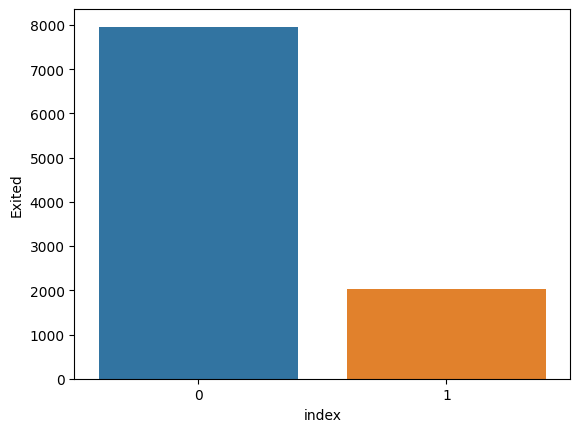

In [12]:
target = df['Exited'].value_counts().reset_index()
sns.barplot(data=target, x='index', y='Exited', );
target

### Identificando Outliers

In [27]:
numeric = ['Balance', "EstimatedSalary"]
df_numeric = df[numeric]
df_numeric.head()

,Balance,EstimatedSalary
0,0.00,101348.88
1,83807.86,112542.58
2,159660.80,113931.57
3,0.00,93826.63
4,125510.82,79084.10


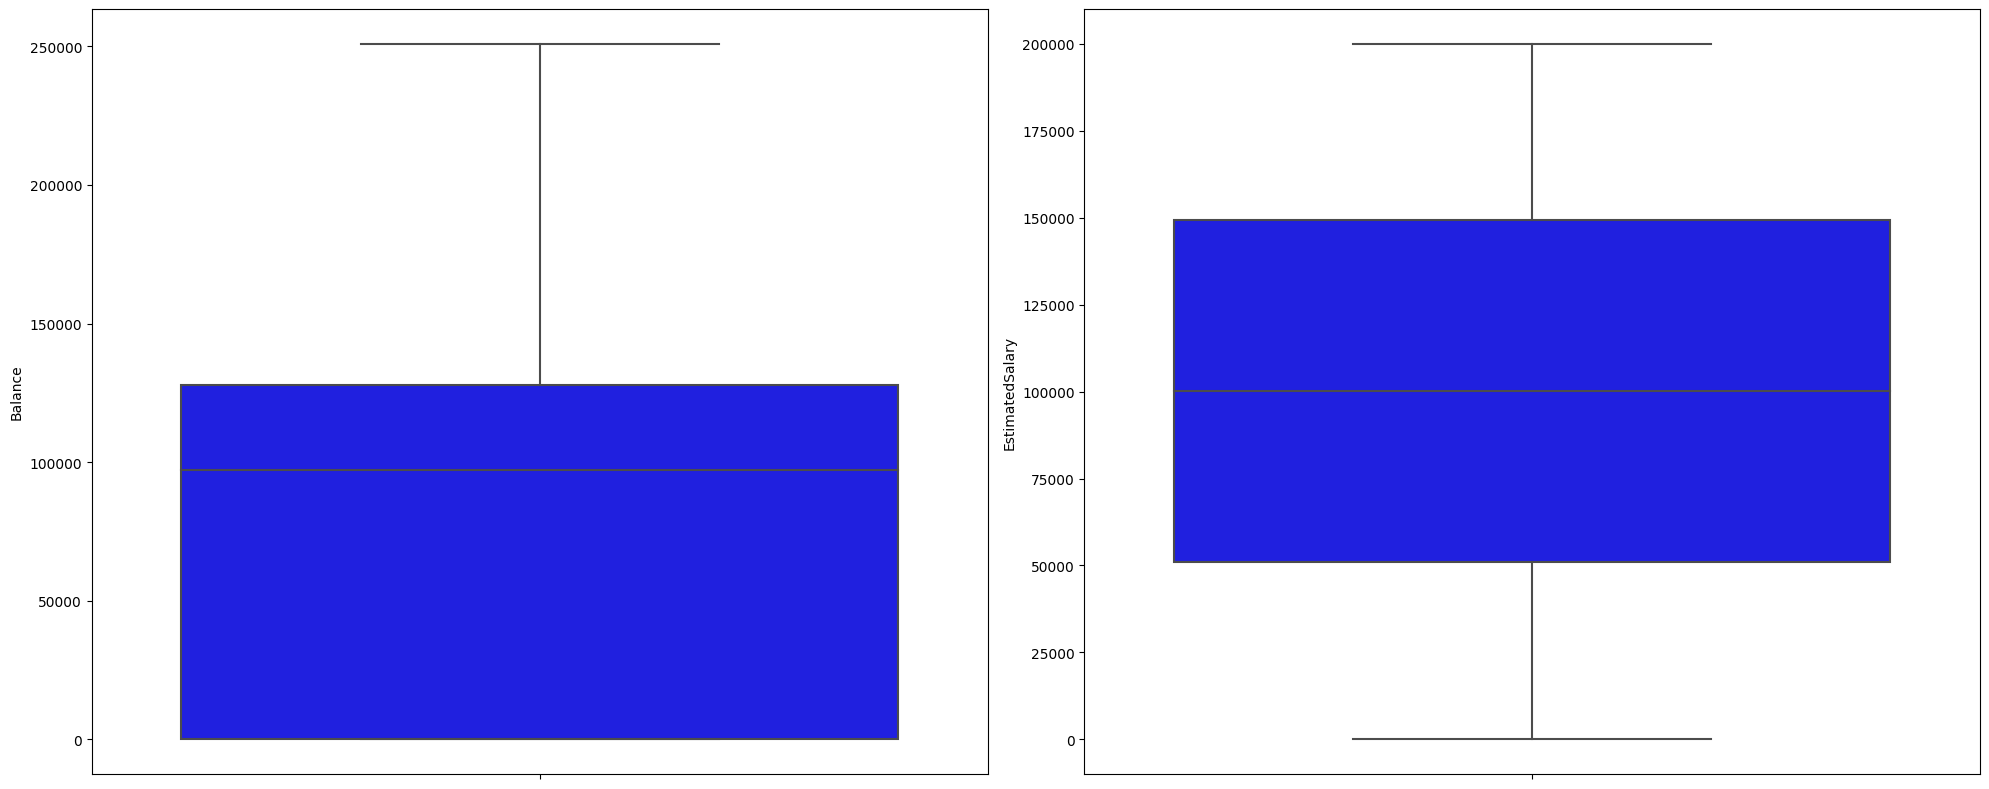

In [29]:
plt.figure(figsize=(20, 8))
for i in range(len(numeric)):
    plt.subplot(1, len(numeric), i + 1)
    sns.boxplot(y=df[numeric[i]], color='blue')
    plt.tight_layout()

In [32]:
for col in numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    
    nilai_min = df[col].min()
    nilai_max = df[col].max()
    lower_lim = Q1 - (1.5*IQR)
    upper_lim = Q3 + (1.5*IQR)

    # Outliers
    if (nilai_min < lower_lim):
        print('Outliers inferiores encontrados na coluna',col,'<', lower_lim,'\n')
        print('Quantiadade de outliers inferiores na coluna',col, ':', len(list(df[df[col] < lower_lim])))
    elif (nilai_max > upper_lim):
        print('Outliers superiores encontrados na coluna',col,'>', upper_lim,'\n')
        print('Quantiadade de outliers superiores na coluna',col, ':', len(list(df[df[col] > upper_lim])))

    else:
        print('Nenhum outlier na coluna',col,'\n')


Nenhum outlier na coluna Balance 

Nenhum outlier na coluna EstimatedSalary 



### Distribuição dos Dados

C:\Users\rafael.lima\AppData\Local\Temp\ipykernel_21144\3703558774.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric[i]], color='orange')
C:\Users\rafael.lima\AppData\Local\Temp\ipykernel_21144\3703558774.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric[i]], color='ora

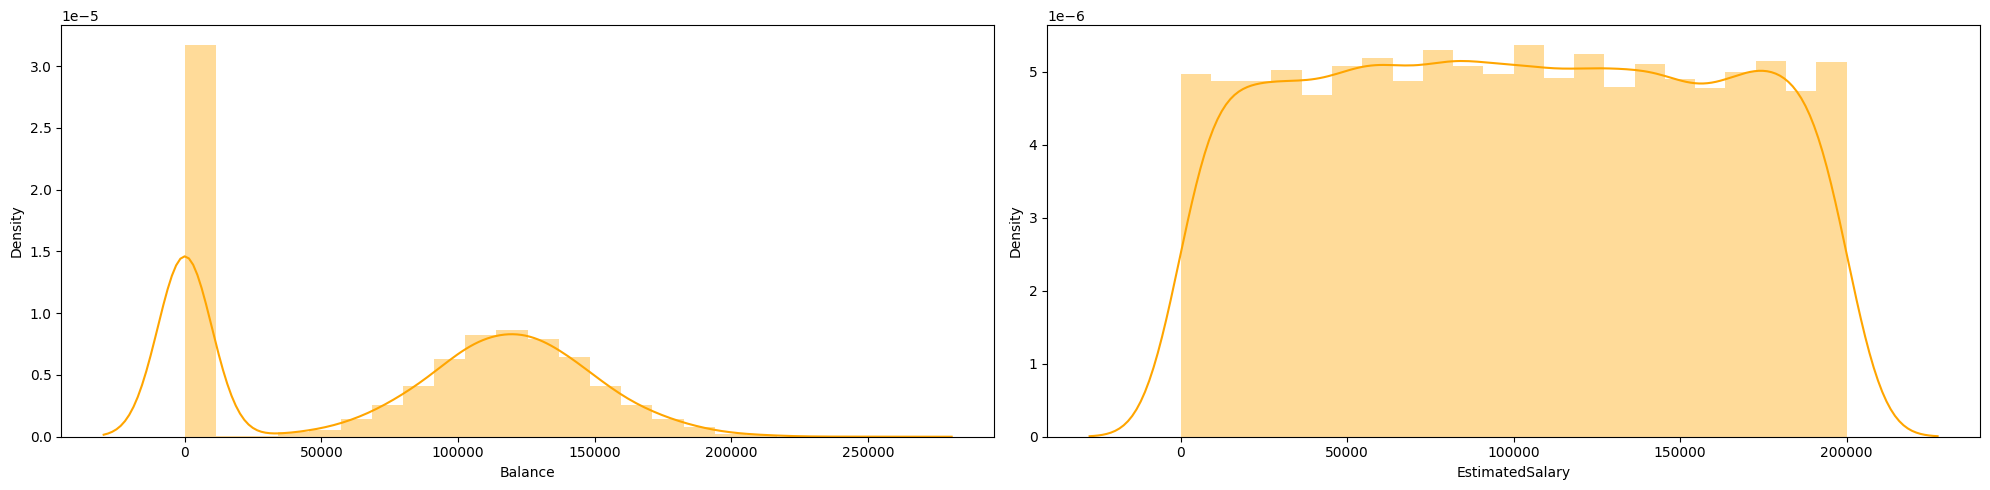

In [37]:
plt.figure(figsize=(20,5))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.distplot(df[numeric[i]], color='orange')
    plt.tight_layout()
    ####